# Домашнее задание 
# Математика — Домашнее задание 10
# А.&#8201;Д. Егоров

In [1]:
import numpy as np 
from scipy import optimize as opt 
import matplotlib.pyplot as plt 

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
%matplotlib inline

## Задача 1
### Условие задачи:

Найти экстремумы функции $f_0(x) = \displaystyle \sum_{i=1}^{n}x_i^2 $ на множестве $g (x) = \displaystyle \sum_{i=1}^{n}x_i^4, \ g(x) \leqslant 1$, то есть решить задачу
\begin{equation*}
    \begin{cases}
        f(x) \rightarrow extr, \\
        g(x) \leqslant 1, \\
    \end{cases}
\end{equation*}
где $x = (x_1, \cdots, x_n)^T$.


Решить аналитически и проверить при помощи оптимизатора в Python. Оптимизатор можно использовать на своё усмотрение.

### Аналитическое решение 

Функция Лагранжа: 

\begin{equation*}
    L(x, \lambda) = \lambda_0 f_0(x) + \lambda_1 f_1(x),
\end{equation*}
где $f_1(x) = g(x) - 1$.

Система: 

\begin{equation*}
    \begin{cases}
        \dfrac{\partial L}{\partial x_i} = 2 \lambda_0 x_i +  4 \lambda_1 x_i^3 = 0, \quad i = \overline{1, n} \\
        \lambda_1(x_1^4 + \cdots + x_n^4 - 1) = 0.
    \end{cases}
\end{equation*}

Рассмотрим случай $\lambda_0 = 0$:
\begin{equation*}
    \begin{cases}
        4 \lambda_1 x_i^3 = 0, \quad i = \overline{1, n} \\
        \lambda_1(x_1^4 + \cdots + x_n^4 - 1) = 0.
    \end{cases}
\end{equation*}
Полученная система разрешима, только при $\lambda_1 = 1$, следовательно, подозрительных на экстремум точек не возникает.

Рассмотрим случай $\lambda_0 \neq 0$:



Тогда система примет вид: 

\begin{equation*}
    \begin{cases}
        x_i (\lambda_0  +  2 \lambda_1 x_i^2) = 0, \quad i = \overline{1, n} \\
        \lambda_1(x_1^4 + \cdots + x_n^4 - 1) = 0.
    \end{cases}
\end{equation*}

Заметим, что система разрешена в точке с координатами 
$\lambda_1 = 0, x_i = 0, i = \overline{1, n}$. 
При подстановке данной точки целевую функцию получим $f(x) = 0$, а так как $f(x) >= 0$, то точка $x_0 = (0, \cdots, 0)$ --- точка глобального минимума функции.


Теперь рассмотрим $\lambda_1 \neq 0$. Систему можно перезаписать следующим образом: 
\begin{equation*}
    \begin{cases}
        x_i (\lambda_0  +  2 \lambda_1 x_i^2) = 0, \quad i = \overline{1, n} \\
        x_1^4 + \cdots + x_n^4 - 1 = 0.
    \end{cases}
\end{equation*}

Для уравнений 
$$x_i (\lambda_0  +  2 \lambda_1 x_i^2) = 0, \ i = \overline{1, n}$$  
существует три корня: 
$$x_{i_0} = 0, \ x_{i_{1, 2}} = \pm \sqrt{- \dfrac{\lambda_0}{2 \lambda_1}}.$$ 

Логично предположить, что исходная система разрешима, когда какие-то из корней равны 0, а оставшиеся не нулевые удовлетворяют второму уравнению системы. Пусть количество ненулевых корней равно $m$, то есть существуют индексы $i \in I, \ m = |I|$, где $I$ &mdash; множество индексов, таких, что $x_i \neq 0$. 
Тогда для второго уравнения системы верно: 
\begin{equation*}
        \displaystyle
        \sum_{i = 1}^{n} x_i^4 = \sum_{i \in I} x_i^4 = m \left( - \dfrac{\lambda_0}{\lambda_1} \right)^2 = 1,
\end{equation*}
отсюда получим, что 
\begin{equation*}
    \left( - \dfrac{\lambda_0}{ 2 \lambda_1} \right)^2 = m,
\end{equation*}

\begin{equation*}
     \dfrac{ 2 \lambda_1}{ \lambda_0} = \pm \sqrt{m}.
\end{equation*}
Из выражения $$x_i (\lambda_0  +  2 \lambda_1 x_i^2) = 0, \ i = \overline{1, n}$$, 
если $x_i \neq 0$, то остается, что $\lambda_0  +  2 \lambda_1 x_i^2 = 0$. Т.к. $\lambda_0 > 0$ из условия согласования знаков, то $\lambda_1 < 0$. Тогда 
\begin{equation*}
     \dfrac{ 2 \lambda_1}{\lambda_0} = - \sqrt{m}.
\end{equation*}

Назовем точку, удовлетворяющая данному условию, как $x_{1, m}$, для которой для $\forall i \in I\,:\,x_{1, m_i} = \pm \left(\dfrac{1}{m}\right)^{1/4}.$

Тогда при подстановке данного решения в целевую функцию получим
\begin{equation*}
    f(x_{1, m}) = \dfrac{m}{\sqrt{m}} = \sqrt m.
\end{equation*}
Чем больше m, тем больше целевая функция. Тогда глобальный условный максимум функции $f_0$ достигается при $m = n$, и $f_{max} = \sqrt n$.

Осталось разобраться с оставшимися подозрительными точками вида $x_{1,m}$, где $m \neq n$.

В данном случае целевая функция $f_0$ дифференцируема всюду в $\mathbb{R}^n$, т.е. дифференцируема в любой точке $x \in \mathbb{R}^n$. Градиент целевой функции будет следующим:
$$
    \mathrm{grad}\, f_0(x) = \left(2x_1, \cdots, 2x_n\right)^T.
$$
Тогда если подставить все оставшиеся подозрительные точки в градиент целевой функции, то он нигде не обнулится, следовательно, локальных экстремумов быть не может.


В дополнение можно сказать, что для функции суммы квадратов по аналогии с обычной квадратичной функцией у нас существует только один глобальный минимум, а максимум будет располагаться на бесконечности. Следовательно, для данной задачи будет существовать только условный максимум, полученный введенным ограничением. Так же по аналогии можно утверждать об отсутствии локальных экстремумов.  

### Численное решение

In [2]:
def task_1(n: int, x0 = None):
    """
    Implementation for numerical demonstration and comparison
    of analytical results and numerical calculations.
    
    n : number of coordinates in space R^n
    """

    def obj_func(x):
        x = np.array(x)
        return (x**2).sum()

    constraints_min = [
        {"type": "ineq", "fun": lambda x: 1.0 - (np.array(x) ** 4).sum()}
    ]
    constraints_max = [
        {"type": "ineq", "fun": lambda x: -1.0 + (np.array(x) ** 4).sum()}
    ]

    if x0 == None:
        x0 = np.ones(n)  # initial guess

    fun_min = opt.minimize(obj_func, x0, constraints=constraints_min)
    fun_max = opt.minimize(obj_func, x0, constraints=constraints_max)
    x = 1 / np.sqrt(np.sqrt(n))

    res_scipy = f"""
    TASK 1

        n = {n}
        space R^n = R^{n}

    --------------------
    
    ANALYTICAL RESULTS: 

        x_min = {[0.] * n}
        fun_min = {0.}

        x_max = {[x] * n}
        fun_max = {(x)**2 * n}
        

    SCIPY RESULTS: 

        x_min = {fun_min.x}
        fun min = {fun_min.fun}

        x_max = {fun_max.x}
        fun_max = {fun_max.fun}
    """

    print(res_scipy)

    pass

### 1D случай


    TASK 1

        n = 1
        space R^n = R^1

    --------------------
    
    ANALYTICAL RESULTS: 

        x_min = [0.0]
        fun_min = 0.0

        x_max = [1.0]
        fun_max = 1.0
        

    SCIPY RESULTS: 

        x_min = [0.]
        fun min = 0.0

        x_max = [1.]
        fun_max = 1.0
    


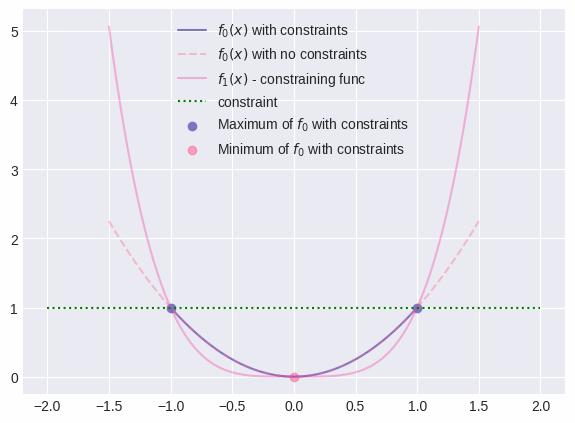

In [3]:
fig = plt.figure(figsize=(7, 5))
x = np.linspace(-1.5, 1.5, 100)
def f(x):
    z_constraint = x**4 - 1
    z = x**2
    return np.where(z_constraint <= 0, z, np.nan)

plt.title("")

plt.plot(x, f(x), label="$f_0(x)$ with constraints")
plt.plot(x, x**2, label="$f_0(x)$ with no constraints", linestyle="--", alpha=0.4)
plt.plot(x, x**4, label="$f_1(x)$ - constraining func", alpha=0.3)
plt.hlines([1],[-2],[2], color="g", linestyle="dotted", label="constraint")
plt.scatter([-1., 1.], [1., 1.], label="Maximum of $f_0$ with constraints")
plt.scatter([0.], [0.], label="Minimum of $f_0$ with constraints")
plt.legend()

task_1(1)
plt.show()

### 2D случай


    TASK 1

        n = 2
        space R^n = R^2

    --------------------
    
    ANALYTICAL RESULTS: 

        x_min = [0.0, 0.0]
        fun_min = 0.0

        x_max = [0.8408964152537146, 0.8408964152537146]
        fun_max = 1.4142135623730954
        

    SCIPY RESULTS: 

        x_min = [0. 0.]
        fun min = 0.0

        x_max = [0.84089642 0.84089642]
        fun_max = 1.4142135626489756
    


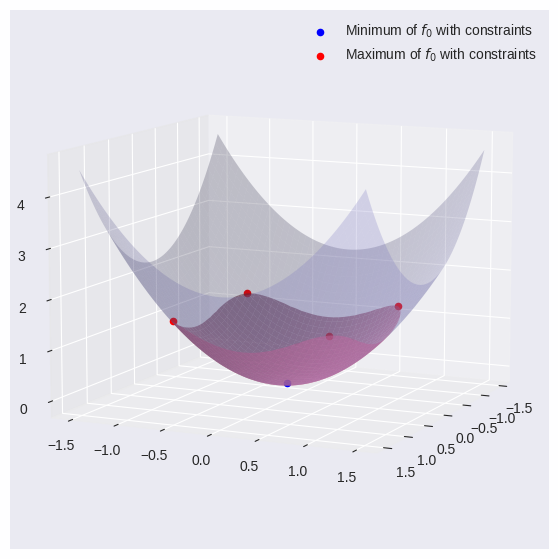

In [4]:
fig = plt.figure(figsize=(7, 7))

ax = plt.axes(projection="3d")

def f(x, y):
    z_constraint = x**4 + y**4 - 1
    z = x**2 + y**2
    return np.where(z_constraint <= 0, z, np.nan)


x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)

x, y = np.meshgrid(x, y)
z = f(x, y)

# z_surf = np.ones(shape=(x.shape[0], y.shape[1]))
# ax.plot_surface(x, y, x**4 + y**4, alpha=0.25, label="$f(x, y) = x^4 + y^4$")
# ax.plot_surface(x, y, z_surf)

ax.plot_surface(
    x, y, x**2 + y**2, alpha=0.25, label="$f(x, y) = x^2 + y^2$, no constraint"
)
ax.plot_surface(x, y, z, label="$f(x, y) = x^2 + y^2$ with constraint")
glob_min = ax.scatter3D([0.0], [0.0], [0.0], color="b", label="Minimum")

for i in range(2):
    x = 0.8408964152537146
    x = x if i == 0 else -x
    for j in range(2):
        y = x if j == 0 else -x
        maxs = ax.scatter3D([x], [y], [1.4142135626489756], color="red", label="Maximum")
ax.view_init(10, 25)
task_1(2)
ax.legend(
    [glob_min, maxs], ["Minimum of $f_0$ with constraints", "Maximum of $f_0$ with constraints"]
)

plt.show()

Для случая, когда 3 координаты график построить уже не представляется возможным. Жалко, что мы ограничены только двухмерной проекцией трехмерных объектов.
Но мы можем получить численный результат:

In [5]:
task_1(3)


    TASK 1

        n = 3
        space R^n = R^3

    --------------------
    
    ANALYTICAL RESULTS: 

        x_min = [0.0, 0.0, 0.0]
        fun_min = 0.0

        x_max = [0.7598356856515925, 0.7598356856515925, 0.7598356856515925]
        fun_max = 1.7320508075688772
        

    SCIPY RESULTS: 

        x_min = [0. 0. 0.]
        fun min = 0.0

        x_max = [0.75983576 0.75983576 0.7598357 ]
        fun_max = 1.732051045477535
    


Результаты `scipy` будут зависеть от выбранного начального приближения x0, т.к. у нашей функции несколько условных максимумов.

По дефолту берется вектор из единиц, 
но можно взять и другой:

In [6]:
def obj_func(x):
        x = np.array(x)
        return (x**2).sum()

constraints_max = [
    {"type": "ineq", "fun": lambda x: -1.0 + (np.array(x) ** 4).sum()}
]

x0 = np.ones(3)  # initial guess
x0[1] = -1

opt.minimize(obj_func, x0, constraints=constraints_max)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.7320510454337072
       x: [ 7.598e-01 -7.598e-01  7.598e-01]
     nit: 5
     jac: [ 1.520e+00 -1.520e+00  1.520e+00]
    nfev: 20
    njev: 5

В следствии получим другую точку максимума. (Всего их в данном случае 8)

С увеличением размерности задачи количество максимумов будет увеличиваться.
Формула для их числа: Number_of_max = $2^n$.

## Задача 2
### Условие задачи

1. Решить аналитически и проверить при помощи оптимизатора в Python. Оптимизатор можно использовать на своё усмотрение (например, ORTools).
2. Также дополнительно помимо оптимизатора использовать какой-нибудь метаэвристический алгоритм (имитация отжига / квантовый отжиг / муравьиный алгоритм / генетический алгоритм) для проверки результатов.
3. Дать оценку устойчивости метаэвристики в зависимости от начальной точки и от количества итераций.

#### Решить задачу коммивояжера методом ветвей и границ: 

\begin{equation*}
    \begin{pmatrix}
        \infty & 4 & 5 & 7 & 5 \\
        8 & \infty & 5 & 6 & 6 \\
        3 & 5 & \infty & 9 & 6 \\
        3 & 5 & 6 & \infty & 2 \\
        6 & 2 & 3 & 8 & \infty \\
    \end{pmatrix}
\end{equation*}

### Аналитическое решение

|         | **A** | **B** | **C** | **D** | **E** | **d_i** |
|---------|-------|-------|-------|-------|-------|---------|
| **A**   | M     | 4     | 5     | 7     | 5     | 4       |
| **B**   | 8     | M     | 5     | 6     | 6     | 5       |
| **C**   | 3     | 5     | M     | 9     | 6     | 3       |
| **D**   | 3     | 5     | 6     | M     | 2     | 2       |
| **E**   | 6     | 2     | 3     | 8     | M     | 2       |
| **d_j** |       |       |       |       |       |         |

Редуцируем по столбцу

|         | **A** | **B** | **C** | **D** | **E** | **d_i** |
|---------|-------|-------|-------|-------|-------|---------|
| **A**   | **M** | 0     | 1     | 3     | 1     | 4       |
| **B**   | 3     | **M** | 0     | 1     | 1     | 5       |
| **C**   | 0     | 2     | **M** | 6     | 3     | 3       |
| **D**   | 1     | 3     | 4     | **M** | 0     | 2       |
| **E**   | 4     | 0     | 1     | 6     | **M** | 2       |
| **d_j** | 0     | 0     | 0     | 1     | 0     |         |

Редуцируем по строке

|         | **A** | **B** | **C** | **D** | **E** | **d_i** |
|---------|-------|-------|-------|-------|-------|---------|
| **A**   | M     | 0     | 1     | 2     | 1     | 4       |
| **B**   | 3     | M     | 0     | 0     | 1     | 5       |
| **C**   | 0     | 2     | M     | 5     | 3     | 3       |
| **D**   | 1     | 3     | 4     | M     | 0     | 2       |
| **E**   | 4     | 0     | 1     | 5     | M     | 2       |
| **d_j** | 0     | 0     | 0     | 1     | 0     | 17      |

Нижняя граница $H_0 = 17$

|         | **A** | **B** | **C** | **D** | **E** | **d_i** |
|---------|-------|-------|-------|-------|-------|---------|
| **A**   | M     | 0(1)  | 1     | 2     | 1     |         |
| **B**   | 3     | M     | 0(1)  | 0(2)  | 1     |         |
| **C**   | 0(3)  | 2     | M     | 5     | 3     |         |
| **D**   | 1     | 3     | 4     | M     | 0(2)  |         |
| **E**   | 4     | 0(1)  | 1     | 5     | M     |         |
| **d_j** |       |       |       |       |       |         |


$$ $$


|         | **A** | **B** | **C** | **D** | **E** | **d_i** |
|---------|-------|-------|-------|-------|-------|---------|
| **A**   | M     | 0     | 1     | 2     | 1     |         |
| **B**   | 3     | M     | 0     | 0     | 1     |         |
| **C**   | M     | 2     | M     | 5     | 3     |         |
| **D**   | 1     | 3     | 4     | M     | 0     |         |
| **E**   | 4     | 0     | 1     | 5     | M     |         |
| **d_j** |       |       |       |       |       |         |


Исключаем (C, A)



Редуцируем и вычисляем $H_1$

|         | **B** | **C** | **D** | **E** | **d_i** |
|---------|-------|-------|-------|-------|---------|
| **A**   | 0     | M     | 2     | 1     | 0       |
| **B**   | M     | 0     | 0     | 1     | 0       |
| **D**   | 3     | 4     | M     | 0     | 0       |
| **E**   | 0     | 1     | 5     | M     | 0       |
| **d_j** | 0     | 0     | 0     | 0     | 0       |


$H_1 = H_0 + 0 = 17$

|         | **B** | **C** | **D** | **E** | **d_i** |
|---------|-------|-------|-------|-------|---------|
| **A**   | 0(1)  | M     | 2     | 1     |         |
| **B**   | M     | 0(1)  | 0(2)  | 1     |         |
| **D**   | 3     | 4     | M     | 0(4)  |         |
| **E**   | 0(1)  | 1     | 5     | M     |         |
| **d_j** |       |       |       |       |         |

$$$$

|         | **B** | **C** | **D** | **E** | **d_i** |
|---------|-------|-------|-------|-------|---------|
| **A**   | 0     | M     | 2     | 1     |         |
| **B**   | M     | 0     | 0     | 1     |         |
| **D**   | 3     | 4     | M     | M     |         |
| **E**   | 0     | 1     | 5     | M     |         |
| **d_j** |       |       |       |       |         |

Исключаем (D, E)


Редуцируем и вычисляем $H_2$

|         | **B** | **C** | **D** | **d_i** |
|---------|-------|-------|-------|---------|
| **A**   | 0     | M     | 2     | 0       |
| **B**   | M     | 0     | 0     | 0       |
| **E**   | 0     | 1     | M     | 0       |
| **d_j** | 0     | 0     | 0     | 0       |

$H_2 = H_1 + 0 = 17$

|         | **B** | **C** | **D** | **d_i** |
|---------|-------|-------|-------|---------|
| **A**   | 0(2)  | M     | 2     |         |
| **B**   | M     | 0(1)  | 0(2)  |         |
| **E**   | 0(1)  | 1     | M     |         |
| **d_j** |       |       |       |         |

$$$$

|         | **B** | **C** | **D** | **d_i** |
|---------|-------|-------|-------|---------|
| **A**   | 0     | M     | 2     |         |
| **B**   | M     | 0     | M     |         |
| **E**   | 0     | 1     | M     |         |
| **d_j** |       |       |       |         |

Исключаем (B, D). 

> Можно было исключить и (A, B), результат от этого не поменяется.

Редуцируем и вычисляем $H_3$

|         | **B** | **C** | **d_i** |
|---------|-------|-------|---------|
| **A**   | 0     | M     | 0       |
| **E**   | M     | 1     | 1       |
| **d_j** |       |       |         |

$$$$

|         | **B** | **C** | **d_i** |
|---------|-------|-------|---------|
| **A**   | 0     | M     | 0       |
| **E**   | M     | 0     | 1       |
| **d_j** | 0     | 0     | 1       |

$H_3 = H_2 + 1 = 18$

Составляем итоговый маршрут, включая (A, B) и (E, C):

$(C, A) \rightarrow (A, B) \rightarrow (B, D) \rightarrow (D, E) \rightarrow (E, C)$

Стоимость маршрута равна $H_{result} = 18$.

Альтернативыный вид ответа:
$2 \rightarrow 0 \rightarrow 1 \rightarrow 3 \rightarrow 4 \rightarrow 2$

### Численное решение 

#### Используем библиотеку `ortools`.

> Ссылка на notebook: 
> https://colab.research.google.com/github/google/or-tools/blob/stable/examples/notebook/constraint_solver/tsp_cities.ipynb#scrollTo=code

In [7]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [8]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = [
        [0, 4, 5, 7, 5],
        [8, 0, 5, 6, 6],
        [3, 5, 0, 9, 6],
        [3, 5, 6, 0, 2],
        [6, 2, 3, 8, 0]
    ]
    data["num_vehicles"] = 1
    data["depot"] = 0
    return data


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()} km")
    index = routing.Start(0)
    plan_output = "Route for vehicle 0:\n"
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += f" {manager.IndexToNode(index)} ->"
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    print(plan_output)
    plan_output += f"Route distance: {route_distance}km\n"


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.km
    if solution:
        print_solution(manager, routing, solution)


main()



Objective: 18 km
Route for vehicle 0:
 0 -> 1 -> 3 -> 4 -> 2 -> 0



#### Метаэвристический алгоритм

##### Имитация отжига (из лекции)

In [9]:
import math
import time
import random
from copy import deepcopy


def compute_way_cost(matrix, path):
    total_cost = 0
    for i in range(0, len(path) - 1):
        first_city = path[i]
        second_city = path[i + 1]
        if matrix[first_city][second_city] == "*":
            return False
        total_cost += matrix[first_city][second_city]
    first_city = path[-1]
    second_city = path[0]
    if matrix[first_city][second_city] == "*":
        return False
    total_cost += matrix[first_city][second_city]
    return total_cost


def get_new_way(path):
    new_way = deepcopy(path)
    first = random.randint(0, len(path) - 1)
    second = random.randint(0, len(path) - 1)
    while second == first:
        second = random.randint(0, len(path) - 1)

    new_way[first], new_way[second] = new_way[second], new_way[first]
    return new_way


def simulated_annealing(matrix, t_0=1000.0, t_min=0.005):
    length = len(matrix)
    template = list(range(0, length))

    global start_time
    start_time = time.time()
    global_min_cost = False
    while not global_min_cost:
        random.shuffle(template)
        global_min_cost = compute_way_cost(matrix, template)
        global_min_way = template
    t_k = t_0
    k = 1
    current_way = template
    current_way_cost = compute_way_cost(matrix, template)

    # print(current_way)

    while t_k > t_min:
        # t_k = t_0 / math.log(1+k)
        t_k = t_0 / (1 + k)
        k += 1

        cost = False
        while not cost:
            new_way = get_new_way(current_way)
            cost = compute_way_cost(matrix, new_way)
        dcost = cost - current_way_cost
        if dcost <= 0:
            current_way_cost = cost
            current_way = new_way
        else:
            change_prob = math.exp(-dcost / t_k)
            random_point = random.random()
            if random_point > change_prob:
                continue
            else:
                current_way_cost = cost
                current_way = new_way

        if current_way_cost < global_min_cost and current_way_cost != False:
            global_min_cost = current_way_cost
            global_min_way = current_way

    return global_min_way, global_min_cost, k, matrix


In [10]:
matr = [
    [0, 4, 5, 7, 5],
    [8, 0, 5, 6, 6],
    [3, 5, 0, 9, 6],
    [3, 5, 6, 0, 2],
    [6, 2, 3, 8, 0],
]


a, b, c, m = simulated_annealing(matr, t_0=10, t_min=0.0001)
seconds = time.time() - start_time
a = "-".join([str(i) for i in a]) + f"-{str(a[0])}"
print("Алгоритм: Имитация отжига")
print(f"Количество итераций: {c}")
print(f"Время выполнения: {seconds} секунд")
print(f"Маршрут обхода: {a}")
print(f"Стоимость: {round(b, 1)}")

Алгоритм: Имитация отжига
Количество итераций: 100000
Время выполнения: 0.5775978565216064 секунд
Маршрут обхода: 0-1-3-4-2-0
Стоимость: 18


In [11]:
matr = [
    [0, 4, 5, 7, 5],
    [8, 0, 5, 6, 6],
    [3, 5, 0, 9, 6],
    [3, 5, 6, 0, 2],
    [6, 2, 3, 8, 0],
]


a, b, c, m = simulated_annealing(matr, t_0=1, t_min=0.1)
seconds = time.time() - start_time
a = "-".join([str(i) for i in a]) + f"-{str(a[0])}"
print("Алгоритм: Имитация отжига")
print(f"Количество итераций: {c}")
print(f"Время выполнения: {seconds} секунд")
print(f"Маршрут обхода: {a}")
print(f"Стоимость: {round(b, 1)}")

Алгоритм: Имитация отжига
Количество итераций: 10
Время выполнения: 0.00010395050048828125 секунд
Маршрут обхода: 1-2-0-3-4-1
Стоимость: 19


С уменьшением числа итераций уменьшается и вероятность получения оптимального маршрута (вероятность перескачить из одного состояния в другое).

##### Муравьиный алгоритм

> Ссылка: 
> https://github.com/plushchaynikolay/ant_algorithm/blob/master/AntAlgorithm.py

In [12]:
START_FROM = ["random", "form_one", "uniform"]

ANT_SYS_MODIF = ["cycle", "density", "quantity"]


class AntAlgorithm:
    def __init__(
        self,
        a=1,  # коэффициент запаха
        b=1,  # коэффициент расстояния
        rho=0.5,  # коэффициент высыхания
        Q=1,  # количество выпускаемого феромона
        e=0,  # количество элитных муравьев
        local_refresh=False,  # локальное обновление феромона
        where_to_start="random",  # место начала движения муравьев
        as_modif="density",  # модификация обновления феромона
        random_seed=-1,  # фиксация генератора случайных чисел
    ):
        self.a = a
        self.b = b
        self.rho = rho
        self.Q = Q
        self.e = int(e)
        self.local_refresh = local_refresh
        if where_to_start in START_FROM:
            self.where_to_start = where_to_start
        else:
            raise ValueError("wrong where to start")
        if as_modif in ANT_SYS_MODIF:
            self.as_modif = as_modif
        else:
            raise ValueError("wrong ant-system modification name")
        if random_seed > 0:
            np.random.seed(random_seed)

    # START_FROM = {'random': randomly,
    #   'form_one': from_one,
    #   'uniform': uniform}

    def fit(
        self,
        L,  # Матрица смежности графа
        AGES=-1,  # количество поколений
        ANTS=-1,  # количество муравьев в поколении
        ph=-1,  # начальное значение ферромона
    ):
        self.L = L
        self.CITIES = len(L)
        if AGES > 0:
            self.AGES = int(AGES)
        else:
            self.AGES = self.CITIES * 50
        if ANTS > 0:
            self.ANTS = int(ANTS)
        else:
            self.ANTS = self.CITIES
        if ph >= 0:
            self.ph = ph
        else:
            self.ph = self.Q / self.CITIES

        # инициализация матрицы "краткости" дуг графа
        rev_L = np.zeros(shape=L.shape)
        rev_L = np.where(np.abs(L) >= 1e-9, 1 / L, 0.)
        # инициализация матрицы феромонов
        tao = np.ones((self.CITIES, self.CITIES)) * self.ph

        self.BEST_DIST = float("inf")  # лучшая длина маршрута
        self.BEST_ROUTE = None  # лучший маршрут
        # матрица маршрутов муравьев в одном поколении (номера узлов графа)
        antROUTE = np.zeros((self.ANTS, self.CITIES))
        # вектор длины маршрута муравьев в одном поколении
        antDIST = np.zeros(self.ANTS)
        # вектор лучших длин маршрутов в каждом поколении
        self.antBEST_DIST = np.zeros(self.AGES)
        self.antAVERAGE_DIST = np.zeros(self.AGES)

        # основной цикл алгоритма
        # ---------- начало освновного цикла ----------
        for age in range(self.AGES):
            antROUTE.fill(0)
            antDIST.fill(0)

            # ---------- начало цикла обхода графа муравьями ----------
            for k in range(self.ANTS):
                if self.where_to_start == "random":
                    # начальное расположение муравья в графе (случайное)
                    antROUTE[k, 0] = np.random.randint(
                        low=0, high=self.CITIES - 1, size=1
                    )
                elif self.where_to_start == "uniform":
                    # начальное расположение муравья в графе (равномерное)
                    antROUTE[k, 0] = k % self.CITIES
                elif self.where_to_start == "from_one":
                    # начальное расположение муравья в графе (все с одного)
                    antROUTE[k, 0] = 1
                else:
                    assert "wrong where to start"

                # ---------- начало обхода графа k-ым муравьем ----------
                for s in range(1, self.CITIES):
                    # текущее положение муравья
                    from_city = int(antROUTE[k, s - 1])
                    P = (tao[from_city] ** self.a) * (rev_L[from_city] ** self.b)
                    # вероятность посещения уже посещенных городов = 0
                    for i in range(s):
                        P[int(antROUTE[k, i])] = 0

                    # вероятность выбора направления, сумма всех P = 1
                    assert (
                        np.sum(P) > 0
                    ), "Division by zero. P = %s," " \n tao = %s \n rev_L = %s" % (
                        P,
                        tao[from_city],
                        rev_L[from_city],
                    )
                    P = P / np.sum(P)
                    # выбираем направление
                    isNotChosen = True
                    while isNotChosen:
                        rand = np.random.rand()
                        for p, to in zip(P, list(range(self.CITIES))):
                            if p >= rand:
                                # записываем город №s в вектор k-ого муравья
                                antROUTE[k, s] = to
                                isNotChosen = False
                                break
                    # локальное обновление феромона
                    if self.local_refresh:
                        for s in range(self.CITIES):
                            city_to = int(antROUTE[k, s])
                            city_from = int(antROUTE[k, s - 1])
                            if self.as_modif == "cycle":
                                tao[city_from, city_to] = tao[city_from, city_to] + (
                                    self.Q / antDIST[k]
                                )
                            elif self.as_modif == "density":
                                tao[city_from, city_to] = (
                                    tao[city_from, city_to] + self.Q
                                )
                            elif self.as_modif == "quantity":
                                tao[city_from, city_to] = tao[city_from, city_to] + (
                                    self.Q / L[city_from, city_to]
                                )
                            else:
                                assert "wrong ant-system modification name"
                            tao[city_to, city_from] = tao[city_from, city_to]
                # ---------- конец цила обхода графа ----------

                # вычисляем длину маршрута k-ого муравья
                for i in range(self.CITIES):
                    city_from = int(antROUTE[k, i - 1])
                    city_to = int(antROUTE[k, i])
                    antDIST[k] += L[city_from, city_to]

                # сравниваем длину маршрута с лучшим показателем
                if antDIST[k] < self.BEST_DIST:
                    self.BEST_DIST = antDIST[k]
                    self.BEST_ROUTE = antROUTE[k]
            # ---------- конец цикла обхода графа муравьями ----------

            # ---------- обновление феромонов----------
            # высыхание по всем маршрутам (дугам графа)
            tao *= 1 - self.rho

            # цикл обновления феромона
            for k in range(self.ANTS):
                for s in range(self.CITIES):
                    city_to = int(antROUTE[k, s])
                    city_from = int(antROUTE[k, s - 1])
                    if self.as_modif == "cycle":
                        tao[city_from, city_to] = tao[city_from, city_to] + (
                            self.Q / antDIST[k]
                        )
                    elif self.as_modif == "density":
                        tao[city_from, city_to] = tao[city_from, city_to] + self.Q
                    elif self.as_modif == "quantity":
                        tao[city_from, city_to] = tao[city_from, city_to] + (
                            self.Q / L[city_from, city_to]
                        )
                    else:
                        assert "wrong ant-system modification name"
                    tao[city_to, city_from] = tao[city_from, city_to]

            # проход элитных е-муравьев по лучшему маршруту
            if self.e > 0:
                for s in range(self.CITIES):
                    city_to = int(self.BEST_ROUTE[s])
                    city_from = int(self.BEST_ROUTE[s - 1])
                    if self.as_modif == "cycle":
                        tao[city_from, city_to] = tao[city_from, city_to] + (
                            (self.Q * self.e) / self.BEST_DIST
                        )
                    elif self.as_modif == "density":
                        tao[city_from, city_to] = (
                            tao[city_from, city_to] + self.Q * self.e
                        )
                    elif self.as_modif == "quantity":
                        tao[city_from, city_to] = tao[city_from, city_to] + (
                            (self.Q * self.e) / L[city_from, city_to]
                        )
                    else:
                        assert "wrong ant-system modification name"
                    tao[city_to, city_from] = tao[city_from, city_to]

            # ---------- конец обновления феромона ----------

            # конец поколения муравьев

            # сбор информации для графиков
            self.antBEST_DIST[age] = self.BEST_DIST
            self.antAVERAGE_DIST[age] = np.average(antDIST)

        return tao

    def get_best_route(self):
        return self.BEST_ROUTE

    def get_best_dist(self):
        return self.BEST_DIST

    def get_best_dists(self):
        return [age for age in range(self.AGES)], self.antBEST_DIST

    def get_average_dists(self):
        return [age for age in range(self.AGES)], self.antAVERAGE_DIST

In [13]:
solver = AntAlgorithm()
matr = [
    [0, 4, 5, 7, 5],
    [8, 0, 5, 6, 6],
    [3, 5, 0, 9, 6],
    [3, 5, 6, 0, 2],
    [6, 2, 3, 8, 0],
]

matr = np.array(matr)

for n_ants in [1, 2, 4, 8, 10]:
    solver.fit(matr, AGES=1, ANTS=n_ants)
    print("Количество муравьев: ", solver.ANTS)
    print("Лучший маршрут: ", solver.get_best_route())
    print("Лучшее расстояние: ", solver.get_best_dist())
    print("-----------\n\n")

Количество муравьев:  1
Лучший маршрут:  [1. 0. 2. 3. 4.]
Лучшее расстояние:  26.0
-----------


Количество муравьев:  2
Лучший маршрут:  [2. 0. 1. 3. 4.]
Лучшее расстояние:  18.0
-----------


Количество муравьев:  4
Лучший маршрут:  [1. 2. 0. 3. 4.]
Лучшее расстояние:  19.0
-----------


Количество муравьев:  8
Лучший маршрут:  [2. 0. 1. 3. 4.]
Лучшее расстояние:  18.0
-----------


Количество муравьев:  10
Лучший маршрут:  [2. 0. 1. 3. 4.]
Лучшее расстояние:  18.0
-----------




/tmp/ipykernel_257794/2099160249.py:64: RuntimeWarning: divide by zero encountered in divide
  rev_L = np.where(np.abs(L) >= 1e-9, 1 / L, 0.)


Естественно, что с увеличением числа муравьев результат будет в среднем улучшаться (т.к. мы не застрахованы от случая, что случайно при большем числе муравьев маршрут окажется не оптимальным).